In [1]:
import singing_mouse_aux_functions as aux_functions
from song_modulation import *
from note_modulation import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.patches import ConnectionPatch

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
threshold = [0, 1.0]
alpha = 0.01
pause_threshold = 3

# Coarse binning parameters
p = dict()
p["pre_length"] = 20
p["post_length"] = 50
p["bin_length"] = 0.5

# Finner binning parameters
p2 = dict()
p2["pre_length"] = 20
p2["post_length"] = 80
p2["bin_length"] = 0.01

smoothing_dict = None

threshold_dict = {
    "../Data/190716/": threshold,
    "../Data/190711/": threshold,
    "../Data/190724/": threshold,
    "../Data/190709/": threshold,
    "../Data/190516/": threshold,
    "../Data/190523/": threshold,
    "../Data/190521/": threshold,
    "../Data/200919/": threshold,
    "../Data/200917/": threshold,
    "../Data/191217/": threshold,
    "../Data/190705/": threshold,
    "../Data/190708/": threshold,
    "../Data/191223/": threshold,
}

In [3]:
# load sessions
data_dir_list = [
    "../Data/190716/",
    "../Data/190711/",
    "../Data/190724/",
    "../Data/190709/",
    "../Data/190516/",
    "../Data/190523/",
    "../Data/190521/",
    "../Data/200919/",
    "../Data/200917/",
    "../Data/191217/",
    "../Data/190705/",
    "../Data/190708/",
    "../Data/191223/",
]
session_list = []
for data_dir in tqdm(data_dir_list):
    s = session_note_modulation(
        data_dir=data_dir, p=p, p2=p2, smoothing_dict=smoothing_dict
    )
    s.select_note_modulation_neurons(threshold=threshold_dict[data_dir])
    session_list.append(s)

  0%|          | 0/13 [00:00<?, ?it/s]/home/ubuntu/NNSingingMouse/Notebooks/note_modulation.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(all_song_syl_length_list)[motor1],
/home/ubuntu/NNSingingMouse/Notebooks/note_modulation.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(all_song_syl_on_list)[motor1],
/home/ubuntu/NNSingingMouse/Notebooks/note_modulation.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or 

Empty list encountered


 77%|███████▋  | 10/13 [00:35<00:11,  3.76s/it]

Empty list encountered


 85%|████████▍ | 11/13 [00:38<00:07,  3.55s/it]

Empty list encountered


100%|██████████| 13/13 [00:41<00:00,  3.21s/it]


/home/ubuntu/NNSingingMouse/Notebooks/note_modulation.py:220: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(return_list)[np.argsort(order_list)],


2891


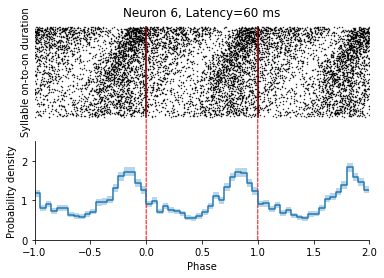

/home/ubuntu/NNSingingMouse/Notebooks/note_modulation.py:220: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(return_list)[np.argsort(order_list)],


2891


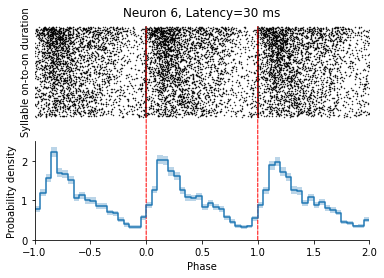

/home/ubuntu/NNSingingMouse/Notebooks/note_modulation.py:220: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(return_list)[np.argsort(order_list)],


2891


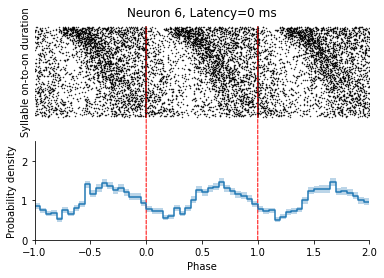

/home/ubuntu/NNSingingMouse/Notebooks/note_modulation.py:220: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(return_list)[np.argsort(order_list)],


2891


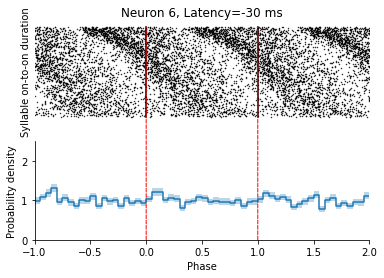

/home/ubuntu/NNSingingMouse/Notebooks/note_modulation.py:220: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(return_list)[np.argsort(order_list)],


2891


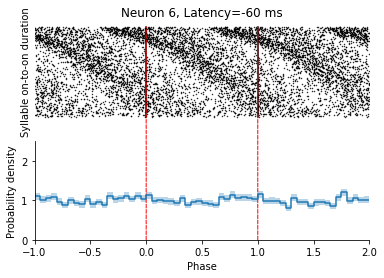

In [4]:
neuron_index = 6
s = session_list[1]

threshold = threshold_dict[s.data_dir]

all_song_syl_length_list, all_song_syl_on_list, all_song_syl_off_list = s.syl_dict[
    "motor"
]
start_sing_time_array, song_length_array = s.start_sing_time_array, s.song_length_array
sp_list = s.sp_list
all_syl_on_list, all_syl_off_list = np.concatenate(
    all_song_syl_on_list
), np.concatenate(all_song_syl_off_list)

delay_set = np.arange(-100, 100) / 1000
delay_op, p_list = find_delay(
    delay_set,
    all_syl_on_list,
    all_syl_off_list,
    s.sp_list[neuron_index],
    threshold,
    cpu=16,
)

bins = np.linspace(-1.0, 2.0, 61)
width = (bins[1] - bins[0]) / 2

for delay in [-0.06, -0.03, 0, 0.03, 0.06]:
    r_order = rank_order(
        all_song_syl_on_list,
        all_song_syl_off_list,
        start_sing_time_array,
        song_length_array,
        rank="duration",
    )
    (
        spike_list,
        off_list,
        history,
        duration_list,
    ) = transform_to_relative_time2_list_latency(
        all_syl_on_list,
        all_syl_off_list,
        sp_list[neuron_index] + delay,
        threshold=threshold,
        order=r_order,
        latency=1.0,
    )
    hist_list_sg = []
    for i, list_i in enumerate(spike_list):
        hist_list_sg.append(np.histogram(list_i, bins)[0])
    his = np.array(hist_list_sg)
    fig, axes = plt.subplots(2, 1)
    x = []
    y = []
    ax = axes[0]
    print(len(spike_list))
    for i in range(len(spike_list)):
        for_plot = np.array(spike_list[i])
        for_plot = for_plot[(for_plot > -1.0).astype("bool")]
        x.extend(list(for_plot))
        y.extend(list(np.ones(len(for_plot)) * i))
    ax.scatter(x, y, color="black", s=0.2)

    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.get_yaxis().set_ticks([])
    ax.arrow(
        -1.04,
        len(spike_list) / 3,
        0.0,
        len(spike_list) / 3,
        shape="full",
        length_includes_head=True,
        head_width=0.03,
        head_length=len(spike_list) / 10,
        color="black",
    )
    ax.set_ylabel("Syllable on-to-on duration")
    ax.set_title("Neuron %d, Latency=%d ms" % (neuron_index, -delay * 1000))
    ax.set_xlim([-1, 2])
    ax.plot([0, 0], [0, len(spike_list)], "k")
    ax.plot([1, 1], [0, len(spike_list)], "k")
    ax.set_xticks([])

    ax = axes[1]
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    xx = np.repeat(bins, 2)[1:-1]
    yy = np.repeat(his.mean(axis=0) / (his.mean(axis=0).sum() * width * 2) * 3, 2)
    yy_error = np.repeat(
        his.std(axis=0) / (his.mean(axis=0).sum() * width * 2) * 3 / np.sqrt(len(his)),
        2,
    )
    ax.plot(xx, yy)
    ax.fill_between(xx, yy - yy_error, yy + yy_error, alpha=0.3)
    ax.set_xlim(-1.06, 2.0)
    ax.set_xlabel("Phase")
    ax.set_ylabel("Probability density")
    con = ConnectionPatch(
        xyA=[0, 0],
        xyB=[0, len(spike_list)],
        coordsA="data",
        coordsB="data",
        axesA=axes[1],
        axesB=axes[0],
        color="red",
        linestyle="--",
    )
    ax.add_artist(con)
    con = ConnectionPatch(
        xyA=[1, 0],
        xyB=[1, len(spike_list)],
        coordsA="data",
        coordsB="data",
        axesA=axes[1],
        axesB=axes[0],
        color="red",
        linestyle="--",
    )
    ax.add_artist(con)
    ax.set_ylim([0, 2.5])
    ax.set_xlim([-1, 2])
    plt.show()

Text(0.5, 1.0, 'Optimal delay: 34 ms')

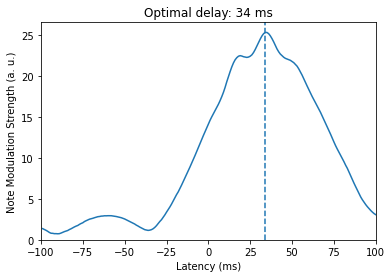

In [6]:
plt.plot(-delay_set * 1000, p_list)
plt.xlim(-100, 100)
plt.ylim(0)
tempt = [0, 1000]
# plt.ylim(tempt)
plt.plot(
    [-delay_op * 1000, -delay_op * 1000],
    tempt,
    "--",
    color=plt.rcParams["axes.prop_cycle"].by_key()["color"][0],
)
plt.xlabel("Latency (ms)")
plt.ylabel("Note Modulation Strength (a. u.)")
plt.title("Optimal delay: %d ms" % (-delay_op * 1000))

In [7]:
sigma = 0.05
modulation_strength_list = []
delay_list = []
phase_list = []
phase_list_s = []
delay_set = np.arange(-150, 150) / 1000
bins = np.linspace(0, 1.0, 21)
for s in tqdm(session_list):
    all_song_syl_length_list, all_song_syl_on_list, all_song_syl_off_list = s.syl_dict[
        "motor"
    ]
    start_sing_time_array, song_length_array = (
        s.start_sing_time_array,
        s.song_length_array,
    )
    sp_list = s.sp_list
    all_syl_on_list, all_syl_off_list = np.concatenate(
        all_song_syl_on_list
    ), np.concatenate(all_song_syl_off_list)
    threshold = threshold_dict[s.data_dir]
    for neuron_index in s.note_modulation["motor"]:
        delay_op, _ = find_delay(
            delay_set,
            all_syl_on_list,
            all_syl_off_list,
            s.sp_list[neuron_index],
            threshold,
            cpu=16,
        )
        delay_list.append(delay_op)
        return_list, _, _, duration_list = transform_to_relative_time2_list_latency(
            all_syl_on_list,
            all_syl_off_list,
            sp_list[neuron_index] + delay_op,
            threshold=threshold,
            order=None,
            latency=0,
        )
        modulation_strength_list.append(
            circ_test(return_list, duration_list, False, True)[1:3]
        )
        hist_list_sg = []
        for i, list_i in enumerate(return_list):
            hist_list_sg.append(np.histogram(list_i, bins)[0])
        his = np.array(hist_list_sg)
        phase_list.append(his.mean(axis=0).argmax())
        tempt_hist = []
        for i in np.linspace(0, 1, 101):
            return_l = np.concatenate(return_list)
            return_l = return_l[(return_l > 0.0) * (return_l < 1.0)]
            return_l = np.concatenate([return_l, return_l - 1.0, return_l + 1.0])
            tempt_hist.append(kernel(np.concatenate(return_list) - i, sigma).sum())
        phase_list_s.append(np.array(tempt_hist).argmax() / 100)

phase_list = (bins[:-1] + (bins[1] - bins[0]) / 2)[np.array(phase_list)] * 2 * np.pi
phase_list_s = np.array(phase_list_s) * 2 * np.pi

100%|██████████| 13/13 [04:20<00:00, 20.00s/it]


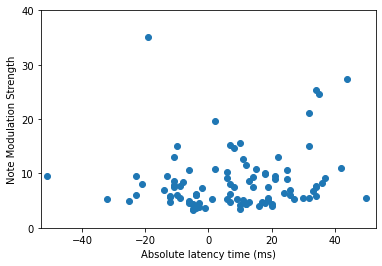

In [9]:
modulation_strength_list = np.array(modulation_strength_list)
drr = modulation_strength_list[:, 0] / (modulation_strength_list[:, 1] + 1e-5)
save_dir = "./fig3/"
plt.scatter(-np.array(delay_list) * 1000, drr)
plt.xlim(-53, 53)
plt.ylim(0, 40)
plt.ylabel("Note Modulation Strength")
plt.xlabel("Absolute latency time (ms)")
plt.locator_params(axis="y", nbins=6)